In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
import array
import statistics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [2]:
df = pd.read_csv('data\pems_output_air_quality.csv',header=0)
print(df.head)

<bound method NDFrame.head of              DateTime   CO  NOx  NO2
0     3/10/2004 18:00  2.6  166  113
1     3/10/2004 19:00  2.0  103   92
2     3/10/2004 20:00  2.2  131  114
3     3/10/2004 21:00  2.2  172  122
4     3/10/2004 22:00  1.6  131  116
...               ...  ...  ...  ...
9352   4/4/2005 10:00  3.1  472  190
9353   4/4/2005 11:00  2.4  353  179
9354   4/4/2005 12:00  2.4  293  175
9355   4/4/2005 13:00  2.1  235  156
9356   4/4/2005 14:00  2.2  265  168

[9357 rows x 4 columns]>


In [3]:
df = df[:500]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DateTime  500 non-null    object 
 1   CO        500 non-null    float64
 2   NOx       500 non-null    int64  
 3   NO2       500 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 15.8+ KB


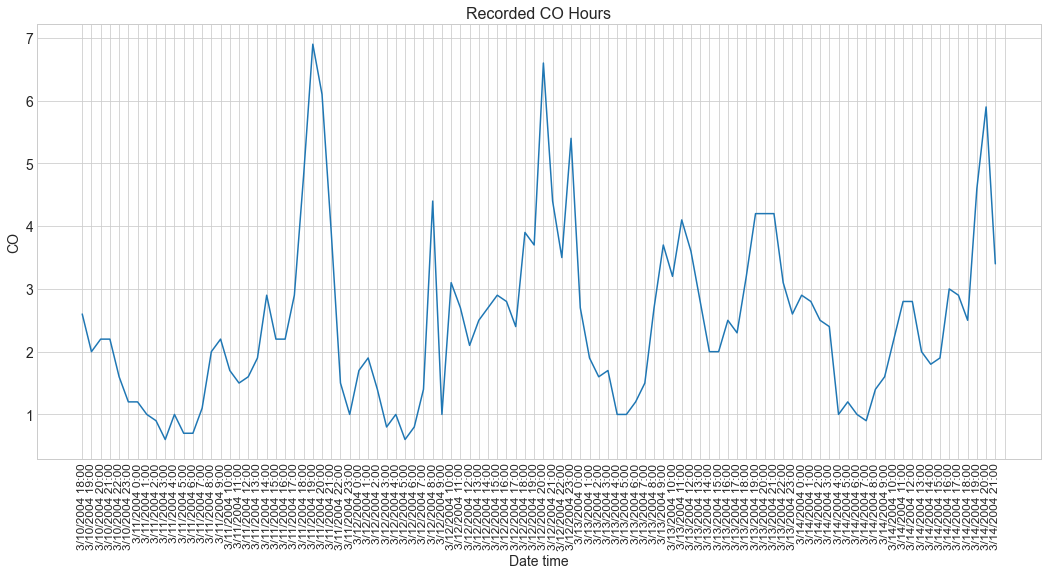

In [4]:
df_graph = df[:100]
plt.figure(figsize=(18, 8))
plt.plot(df_graph.DateTime, df_graph['CO'])
plt.xlabel("Date time", fontsize=14)
plt.ylabel("CO", fontsize=14)
plt.xticks(np.arange(0, len(df_graph.DateTime)+1, 1), rotation=90, fontsize=12)
plt.yticks(fontsize=14)
plt.title("Recorded CO Hours", fontsize=16)
plt.show()

In [5]:
window = 30
window_start_index = 0
knn_neighbors = 15
N = len(df)
print('Data Length:',N)

a_list = list(range(1, N+1))

Data Length: 500


In [6]:
Before_imputation = df
missing_val_locations = [31,55,79,256,280,472]
#missing_val_locations = [31,55]
missing_val = []

for x in missing_val_locations:
    print('Try to impute this value:',Before_imputation.iloc[x,1])
    missing_val.append(Before_imputation.iloc[x,1])
    Before_imputation.iloc[x,1] = np.nan;
Before_imputation.DateTime=a_list

print(Before_imputation)

Try to impute this value: 1.9
Try to impute this value: 1.9
Try to impute this value: 2.8
Try to impute this value: 1.7
Try to impute this value: 1.8
Try to impute this value: 4.7
     DateTime   CO  NOx  NO2
0           1  2.6  166  113
1           2  2.0  103   92
2           3  2.2  131  114
3           4  2.2  172  122
4           5  1.6  131  116
..        ...  ...  ...  ...
495       496  2.2  181  125
496       497  1.7  144  118
497       498  1.9  140  109
498       499  2.9  204  123
499       500  2.2  149  114

[500 rows x 4 columns]


In [7]:
imputer = KNNImputer(n_neighbors=knn_neighbors)
counter = 0
biSWknn_imputed_vals = []
for missing_val_loc in missing_val_locations:
    print('missing_val_loc', missing_val_loc)
    print('Try to impute this value:',missing_val[counter])
    list_imputed_vals = []
    for i in range(0, window):
        start_index = missing_val_loc - (window - 1)+i
        end_index = start_index + window
        missing_val_index = end_index-(start_index+1+i)
        #print('start index', start_index)
        #print('end index', end_index)
        working_data = Before_imputation[start_index : end_index]
        #print('working_data',working_data)
        #print('Try to impute this value:',working_data.iloc[missing_val_loc-i,1])
        After_imputation = imputer.fit_transform(working_data)
        # print dataset after performing the operation
        #print("\n\nAfter performing imputation\n",After_imputation)
        #print("\n1------------",missing_val_loc-i)
        #print("\n2------------",missing_val_index)
        #print('Try to impute this value:',After_imputation[missing_val_loc-i,1])
        #print('After impute this value:',After_imputation[missing_val_index,1])
        list_imputed_vals.append(After_imputation[missing_val_index,1])
    counter = counter + 1;
    #print('list of possible values',list_imputed_vals)  
    print('Mean of data-set is : ',statistics.mean(list_imputed_vals))
    biSWknn_imputed_vals.append(statistics.mean(list_imputed_vals))
    #print('Median of data-set is : ',statistics.median(list_imputed_vals))

missing_val_loc 31
Try to impute this value: 1.9
Mean of data-set is :  2.080222222222222
missing_val_loc 55
Try to impute this value: 1.9
Mean of data-set is :  2.2782222222222224
missing_val_loc 79
Try to impute this value: 2.8
Mean of data-set is :  2.545777777777778
missing_val_loc 256
Try to impute this value: 1.7
Mean of data-set is :  1.8186666666666667
missing_val_loc 280
Try to impute this value: 1.8
Mean of data-set is :  1.8
missing_val_loc 472
Try to impute this value: 4.7
Mean of data-set is :  2.694666666666667


### Regression accuracy metrics

   The MSE, MAE, RMSE, and R-Squared are mainly used metrics to evaluate the prediction error rates and model performance in regression analysis.
   
- MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
- MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
- RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
- R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

In [8]:
print('Actual values:',missing_val)
print('Predicted values:',biSWknn_imputed_vals)

r2 = r2_score(missing_val,biSWknn_imputed_vals)
print('R2 score of sliding window bi-direction KNN:',r2)

rmse = mean_squared_error(missing_val, biSWknn_imputed_vals, squared=False)
print('RMSE score of sliding window bi-direction KNN:',rmse)

mae = mean_absolute_error(missing_val, biSWknn_imputed_vals)
print('MAE score of sliding window bi-direction KNN:',mae)

Actual values: [1.9, 1.9, 2.8, 1.7, 1.8, 4.7]
Predicted values: [2.080222222222222, 2.2782222222222224, 2.545777777777778, 1.8186666666666667, 1.8, 2.694666666666667]
R2 score of sliding window bi-direction KNN: 0.36875916447944024
RMSE score of sliding window bi-direction KNN: 0.8441568369871197
MAE score of sliding window bi-direction KNN: 0.4894444444444444


In [9]:
imputer = KNNImputer(n_neighbors=knn_neighbors)
knn_imputed_vals = []
After_imputation = imputer.fit_transform(Before_imputation)
 # print dataset after performing the operation
for missing_val_loc in missing_val_locations:
    print("After performing imputation\n",After_imputation[missing_val_loc,1])
    knn_imputed_vals.append(After_imputation[missing_val_loc,1])

After performing imputation
 2.033333333333333
After performing imputation
 2.1066666666666665
After performing imputation
 2.666666666666667
After performing imputation
 1.8666666666666665
After performing imputation
 1.76
After performing imputation
 3.6333333333333333


In [10]:
print('Actual values:',missing_val)
print('Predicted values:',knn_imputed_vals)

r2 = r2_score(missing_val,knn_imputed_vals)
print('R2 score of KNNImputer:',r2)

rmse = mean_squared_error(missing_val, knn_imputed_vals, squared=False)
print('RMSE score of KNNImputer:',rmse)

mae = mean_absolute_error(missing_val, knn_imputed_vals)
print('MAE score of KNNImputer:',mae)

Actual values: [1.9, 1.9, 2.8, 1.7, 1.8, 4.7]
Predicted values: [2.033333333333333, 2.1066666666666665, 2.666666666666667, 1.8666666666666665, 1.76, 3.6333333333333333]
R2 score of KNNImputer: 0.8161286089238845
RMSE score of KNNImputer: 0.4555989139258021
MAE score of KNNImputer: 0.29111111111111104


In [11]:
sim_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
sim_imputed_vals = []
After_sim_imputation = sim_imputer.fit_transform(Before_imputation)
 # print dataset after performing the operation
for missing_val_loc in missing_val_locations:
    print("After performing imputation\n",After_sim_imputation[missing_val_loc,1])
    sim_imputed_vals.append(After_sim_imputation[missing_val_loc,1])

After performing imputation
 2.24412955465587
After performing imputation
 2.24412955465587
After performing imputation
 2.24412955465587
After performing imputation
 2.24412955465587
After performing imputation
 2.24412955465587
After performing imputation
 2.24412955465587


In [12]:
print('Actual values:',missing_val)
print('Predicted values:',sim_imputed_vals)

r2 = r2_score(missing_val,sim_imputed_vals)
print('R2 score of SimpleImputer:',r2)

rmse = mean_squared_error(missing_val, sim_imputed_vals, squared=False)
print('RMSE score of SimpleImputer:',rmse)

mae = mean_absolute_error(missing_val, sim_imputed_vals)
print('MAE score of SimpleImputer:',mae)

Actual values: [1.9, 1.9, 2.8, 1.7, 1.8, 4.7]
Predicted values: [2.24412955465587, 2.24412955465587, 2.24412955465587, 2.24412955465587, 2.24412955465587, 2.24412955465587]
R2 score of SimpleImputer: -0.043868592125881234
RMSE score of SimpleImputer: 1.0855467079361416
MAE score of SimpleImputer: 0.7813765182186234
